In [97]:
import SQLPanda

df = SQLPanda.lite_load("database.sqlite3")


In [98]:
df.info().loc[9,"sql"]

'CREATE TABLE grade_distributions(\n  "course_offering_uuid" TEXT,\n  "section_number" TEXT,\n  "n_count" TEXT,\n  "c_count" TEXT,\n  "f_count" TEXT,\n  "cr_count" TEXT,\n  "p_count" TEXT,\n  "nw_count" TEXT,\n  "other_count" TEXT,\n  "bc_count" TEXT,\n  "u_count" TEXT,\n  "d_count" TEXT,\n  "ab_count" TEXT,\n  "a_count" TEXT,\n  "s_count" TEXT,\n  "i_count" TEXT,\n  "b_count" TEXT,\n  "nr_count" TEXT\n)'

In [99]:
df.tables()

,name
0,sections
1,instructors
2,course_offerings
3,subject_memberships
4,courses
5,rooms
6,teachings
7,subjects
8,schedules
9,grade_distributions


In [100]:


grade_d_orig = df.q("select * from grade_distributions")

In [101]:
cols = list(grade_d_orig.columns)
cols.remove("course_offering_uuid")
cols.remove("section_number")


In [102]:
for col in cols:
    grade_d_orig[col] = grade_d_orig[col].astype("float")



def addthemf(row):
    total = 0
    for col in ['a_count', 'b_count', 'c_count', 'd_count','f_count']: 
        total += row[col]
    
    return None if total == 0 else row["f_count"] / total
def addthemb(row):
    total = 0
    for col in ['a_count', 'b_count', 'c_count', 'd_count','f_count']: 
        total += row[col]
    
    return None if total == 0 else row["b_count"] / total

def addthemc(row):
    total = 0
    for col in ['a_count', 'b_count', 'c_count', 'd_count','f_count']: 
        total += row[col]
    
    return None if total == 0 else row["c_count"] / total
def addthemd(row):
    total = 0
    for col in ['a_count', 'b_count', 'c_count', 'd_count','f_count']: 
        total += row[col]
    
    return None if total == 0 else row["d_count"] / total
def addthema(row):
    total = 0
    for col in ['a_count', 'b_count', 'c_count', 'd_count','f_count']: 
        total += row[col]
    
    return None if total == 0 else row["a_count"] / total





grade_d_orig["a_perc"] = grade_d_orig.apply(addthema,axis=1)
grade_d_orig["b_perc"] = grade_d_orig.apply(addthemb,axis=1)
grade_d_orig["c_perc"] = grade_d_orig.apply(addthemc,axis=1)
grade_d_orig["d_perc"] = grade_d_orig.apply(addthemd,axis=1)
grade_d_orig["f_perc"] = grade_d_orig.apply(addthemf,axis=1)



data = grade_d_orig.drop(grade_d_orig[grade_d_orig.a_perc.isna()].index)
data = data.drop(data[data.a_perc == 1].index)
section_data = df.q("select uuid,course_offering_uuid,number,instructor_id from sections_clean inner join teachings on teachings.section_uuid = sections_clean.uuid")
section_data = section_data.set_index("course_offering_uuid")
section_data = section_data.drop(["uuid","number"],axis=1)
data = data.join(section_data, on= "course_offering_uuid",how="inner"  )
cols = list(data.columns)
cols.remove("instructor_id")
cols.remove("a_perc")
cols.remove("b_perc")
cols.remove("c_perc")
cols.remove("d_perc")
cols.remove("f_perc")
data_chi = data.copy()
data = data.drop(cols,axis=1)

In [12]:
data.instructor_id.value_counts().shape

(17199,)

In [13]:
'''
import statsmodels.api as sm
from statsmodels.formula.api import ols
formula = 'percents ~ C(instructor_id)'
lm = ols(formula, data).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)
'''
#this did not work due to its slow run

"\nimport statsmodels.api as sm\nfrom statsmodels.formula.api import ols\nformula = 'percents ~ C(instructor_id)'\nlm = ols(formula, data).fit()\ntable = sm.stats.anova_lm(lm, typ=2)\nprint(table)\n"

In [53]:
data.instructor_idructor_id.value_counts().shape

(17199,)

In [16]:
teachers = list(data.instructor_id.value_counts()[:100].index)

In [21]:
teachers

['4291812',
 '606743',
 '3116363',
 '2600830',
 '3002283',
 '2600996',
 '777651',
 '636841',
 '3216300',
 '2602039',
 '3614745',
 '2600022',
 '2600934',
 '682563',
 '4275432',
 '568777',
 '3076440',
 '564570',
 '3777901',
 '4150121',
 '2600121',
 '2601527',
 '5339031',
 '3337031',
 '3986840',
 '1017881',
 '368932',
 '3900615',
 '3085300',
 '3746829',
 '4739455',
 '1066754',
 '5443218',
 '980056',
 '3949560',
 '130429',
 '359342',
 '2602183',
 '4542927',
 '4709223',
 '5312987',
 '3029337',
 '960897',
 '4594118',
 '5015966',
 '3615604',
 '3012257',
 '3767682',
 '4289299',
 '988895',
 '4902673',
 '4435923',
 '298410',
 '1600563',
 '4432700',
 '1036355',
 '1596998',
 '3516086',
 '313242',
 '3471110',
 '527759',
 '4398349',
 '2600516',
 '189101',
 '5117944',
 '3347509',
 '3658460',
 '566960',
 '3921154',
 '979722',
 '3618078',
 '3461621',
 '5161667',
 '1441959',
 '3148654',
 '3756822',
 '3982654',
 '4581886',
 '5184537',
 '3624160',
 '157057',
 '4441893',
 '4724824',
 '3154881',
 '5556718',

In [46]:
import scipy.stats
def split_data(data,instructor_id):
    others = data[data.instructor_id == instructor_id]
    teacher = data[data.instructor_id != instructor_id]
    a = others.a_perc
    b = teacher.a_perc
    return scipy.stats.ttest_ind(a, b, equal_var=False)
dif_teach = []
def split_plots(data,instructor_id):
    teacher = data[data.instructor_id == instructor_id]
    others = data[data.instructor_id != instructor_id]
    a = others.a_perc
    b = teacher.a_perc
    sns.distplot(a,color="blue",label="others")
    sns.distplot(b,color="orange",label="ind_teacher")
    plt.legend()
    


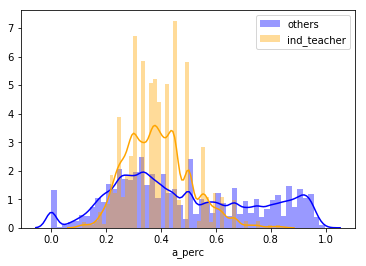

In [48]:
split_plots(data,teachers[teachers.index('4291812')])

In [33]:
dif_totals = []
for teach in teachers:

    if split_data(data,teach)[1] < .05:
        dif_teach.append(teach)
        dif_totals.append((teach,split_data(data,teach)[1]))

In [35]:
len(dif_teach) #the teachers who failed the sameness test

100

In [16]:
#h1 they are the same h0 they are not

1.0000000000001417


Text(0.5, 1.0, 'Agg Letter Grade Perc')

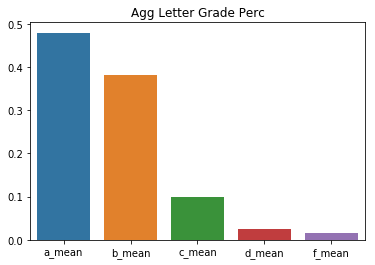

In [60]:
a_mean = data.a_perc.mean()
b_mean = data.b_perc.mean()
c_mean = data.c_perc.mean()
d_mean = data.d_perc.mean()
f_mean = data.f_perc.mean()
print(a_mean+b_mean+c_mean+d_mean+f_mean)
sns.barplot(y=[a_mean,b_mean,c_mean,d_mean,f_mean],x=['a_mean','b_mean','c_mean','d_mean','f_mean'])
plt.title("Agg Letter Grade Perc")

In [152]:
data_chi.shape

(608321, 31)

In [150]:
teacher = data_chi[data.instructor_id == '2601649'].groupby("instructor_id").mean()

Text(0.5, 1.0, 'Non-Distinct Teacher')

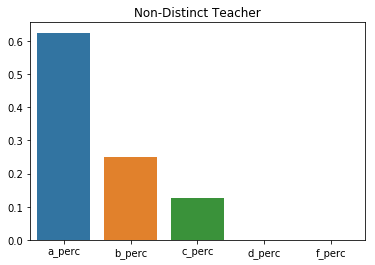

In [151]:


inst_data = teacher[['a_perc',"b_perc","c_perc","d_perc","f_perc"]].iloc[0]

sns.barplot(y=inst_data.values,x=inst_data.index)
plt.title("Non-Distinct Teacher")





In [ ]:


sns.barplot(y=['a_mean','b_mean','c_mean','d_mean',['f_mean']],x=['a_mean','b_mean','c_mean','d_mean','f_mean'])
plt.title("Agg Letter Grade Perc")

In [104]:

def fex(row):
    total = 0
    for col in ['a_count', 'b_count', 'c_count', 'd_count','f_count']: 
        total += row[col]
    
    return total*f_mean
def dex(row):
    total = 0
    for col in ['a_count', 'b_count', 'c_count', 'd_count','f_count']: 
        total += row[col]
    
    return total*d_mean
def cex(row):
    total = 0
    for col in ['a_count', 'b_count', 'c_count', 'd_count','f_count']: 
        total += row[col]
    
    return total*c_mean
def bex(row):
    total = 0
    for col in ['a_count', 'b_count', 'c_count', 'd_count','f_count']: 
        total += row[col]
    
    return total*b_mean
def aex(row):
    total = 0
    for col in ['a_count', 'b_count', 'c_count', 'd_count','f_count']: 
        total += row[col]
    
    return total*a_mean

data_chi["aex"] = grade_d_orig.apply(aex,axis=1)
data_chi["bex"] = grade_d_orig.apply(bex,axis=1)
data_chi["cex"] = grade_d_orig.apply(cex,axis=1)
data_chi["dex"] = grade_d_orig.apply(dex,axis=1)
data_chi["fex"] = grade_d_orig.apply(fex,axis=1)




In [109]:
#chi squared test - does the teacher follow the mean spread?


def chi_sq_are_they_the_same(row):
    f_obs = [row["a_count"],row["b_count"],row["c_count"],row["d_count"],row["f_count"]]
    f_exp = [row["aex"],row["bex"],row["cex"],row["dex"],row["fex"]]
    result = scipy.stats.chisquare(f_obs=f_obs, f_exp=f_exp)
    return result[1]
data_chi["chi_dist_distinct"] = data_chi.apply(chi_sq_are_they_the_same,axis=1)

In [110]:
data_chi["distinct"] = data_chi["chi_dist_distinct"] < .05

In [111]:

data_chi.distinct.sum()/data_chi.shape[0]

0.40764990851869326

In [147]:
data_chi.groupby("instructor_id").mean().chi_dist_distinct.sort_values().tail(100)

instructor_id
4710679    0.875900
4713846    0.877487
3465141    0.881174
4562871    0.881174
3381345    0.881463
3987942    0.883889
3102826    0.883889
817883     0.885040
2600956    0.885149
5388825    0.887834
3078143    0.888279
2600892    0.889591
5048526    0.889591
4543567    0.889591
478353     0.889591
321797     0.889591
3438208    0.890273
4085542    0.890373
4530701    0.890373
3640636    0.890701
3090068    0.892607
5700952    0.892997
5695410    0.892997
3975321    0.893256
5620671    0.893256
3264967    0.894491
3083064    0.895178
3981092    0.895178
2601649    0.896258
3127187    0.896258
             ...   
1440893    0.945711
4699394    0.950869
4600843    0.951279
5019237    0.951279
3660321    0.951279
3018645    0.951279
545608     0.951279
3454992    0.953343
4185901    0.957025
6041471    0.957025
5884534    0.957025
276287     0.957025
4398157    0.957025
4742757    0.957025
5507421    0.957025
2723886    0.968028
1639508    0.968028
3381143    0.968753
635104

In [88]:
data.index = range(data.shape[0])

In [90]:

print(data.iloc[14714])
data[data.chi_dist_distinct == True]


a_perc                      0
b_perc                      0
c_perc                      0
d_perc               0.666667
f_perc               0.333333
instructor_id         4432700
chi_dist_distinct        True
Name: 14714, dtype: object


,a_perc,b_perc,c_perc,d_perc,f_perc,instructor_id,chi_dist_distinct
14714,0.0,0.0,0.0,0.666667,0.333333,4432700,True
14715,0.0,0.0,0.0,0.666667,0.333333,4428675,True
14716,0.0,0.0,0.0,0.666667,0.333333,4428675,True
14717,0.0,0.0,0.0,0.666667,0.333333,4435923,True
14718,0.0,0.0,0.0,0.666667,0.333333,3187519,True
14719,0.0,0.0,0.0,0.666667,0.333333,3801942,True
14720,0.0,0.0,0.0,0.666667,0.333333,4577714,True
14721,0.0,0.0,0.0,0.666667,0.333333,3900615,True
14722,0.0,0.0,0.0,0.666667,0.333333,4594118,True
14723,0.0,0.0,0.0,0.666667,0.333333,4589127,True


In [38]:
#results
#list of teachers that do not fall under the a dist of the rest of the teachers
print(dif_teach)
#percent of top 100 that dif
print(len(dif_teach)/100)
#percent of course sections that did not follow the average dist
print(data.chi_dist_distinct.sum()/data.chi_dist_distinct.shape[0])

['3777901', '2601527', '980056', '3029337', '3921154', '3461621', '4441893', '4170997', '4149757', '2601565']
0.1
0.006396294061852213


In [ ]:
#strategy
#type 1 error(alpha) .05 for both test
#two sample t_test for teachers dist, comparing them to t_dist of all other teachers
#chi squared test for testing full dist of all grades (do not know another way)

In [ ]:
#failure


#was not sure how to handle dof because percents did not add up to 100

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Top 100 most prolific teachers')

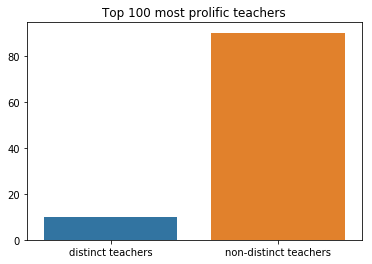

In [5]:
sns.barplot(x=["distinct teachers", "non-distinct teachers"],y=[10,90])
plt.title("Top 100 most prolific teachers")